# INF-0616 - Aula 1: random forest com dataset Iris

Professora: Esther Colombini -- esther@ic.unicamp.br

Monitores: Alana Santana -- alana.correia@ic.unicamp.br
           Hudson Bruno -- hudson.bruno@ic.unicamp.br


Este *notebook* faz parte da disciplina INF-0616 no curso de extensão MDC.  
Demais artefatos podem ser encontrados no moodle da disciplina: 
[moodle.lab.ic.unicamp.br/456](https://moodle.lab.ic.unicamp.br/moodle/course/view.php?id=456)

Instituto de Computação - Unicamp 2021

## O dataset Iris

![iris.png](attachment:iris.png)

- 50 exemplos de 3 diferentes especies de Iridáceas (150 total)
- Features: comprimento da sépala, largula da sépala, comprimento da pétala, largura da pétala

## Carregando os dados

In [ ]:
# importar o módulo load_iris de datasets
from sklearn.datasets import load_iris

# salvar um objeto contendo os dados
iris = load_iris()

In [ ]:
type(iris)

In [ ]:
print(iris.data)

## Terminologia

- Cada linha é uma **observação** (sample, exemplo, instância, registro)
- Cada coluna é uma **feature** (atributo, característica, entrada)

In [ ]:
# nomes das features
print(iris.feature_names)

In [ ]:
# representação das classes
print(iris.target)

In [ ]:
# esquema de codificação: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## Requisitos

1. Features e resposta são **objetos separados**
2. Features e resposta devem ser **numéricas**
3. Features e resposta devem ser **NumPy arrays**
4. Features e resposta devem ter **formatos específicos**

- Cada valor que estamos inferindo é uma **resposta** (alvo, target, outcome, label)

In [ ]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# formato das features (1o dimensão = número de observações, 2o dimensão = numero de features)
print(iris.data.shape)

(150, 4)


In [ ]:
# formato da resposta
print(iris.target.shape)

(150,)


Para facilitar, vamos salvar os nossos feature vectors na variável `X` e as nossas labels na variável `y`:

In [ ]:
# armazena matriz de features em "X"
X = iris.data

# armazena vetor de resposta em "y"
y = iris.target

Vamos fazer a divisão entre conjuntos de treino e teste. Para isso, vamos utilizar a função `train_test_split`:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

Ela irá retornar para nós 4 arrays numpy. Dois contendo as features (`X_train` e `X_test`) e dois contendo as labels (`y_train` e `y_test`) após a divisão dos dados:

In [ ]:
# Separa treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify = y)

In [ ]:
print("Train: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (120, 4) (120,)
Test:  (30, 4) (30,)


O parâmetro `stratify` do método `train_test_split` é responsável por garantir que o número de amostras de cada classe siga a mesma proporção do conjunto inicial nos conjuntos após a divisão. Neste caso, garantimos que os dois conjuntos estejam balanceados nas classes.

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)

[0 1 2] [40 40 40]


### Treino da Random Forest

Vamos importar e treinar uma Random Forest com 10 árvores (parâmetro `n_estimators`) em cima dos dados de treinamento e depois predizer os dados de teste:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfModel = RandomForestClassifier(n_estimators=10)
rfModel.fit(X_train, y_train)

#Predizer os dados de teste
y_pred = rfModel.predict(X_test)

### Avaliando o modelo treinado

In [ ]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from scipy import interp

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    print(title)
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')

Matriz de confusão (em quantidade de elementos)
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


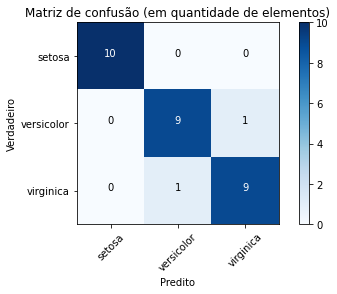

In [ ]:
# Calcula matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

title = 'Matriz de confusão (em quantidade de elementos)'

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names, title=title)

Matriz de confusão (em %)
[[1.  0.  0. ]
 [0.  0.9 0.1]
 [0.  0.1 0.9]]


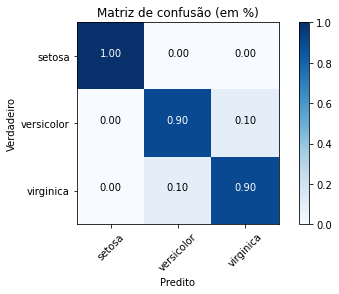

In [ ]:
title = 'Matriz de confusão (em %)'

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names, title=title, normalize=True)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score

print('Classificações corretas =', accuracy_score(y_test, y_pred, normalize=False))
print('Acurácia =', accuracy_score(y_test, y_pred))
print('Acurácia normalizada =', recall_score(y_test, y_pred, average='macro'))

Classificações corretas = 28
Acurácia = 0.9333333333333333
Acurácia normalizada = 0.9333333333333332
